<a href="https://colab.research.google.com/github/ykato27/mplfinance/blob/main/widths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Widths of candles, wicks, ohlc ticks, volume bars

---

---
## Introduction

**The appearance** of candlesticks, their edges, wicks, ohlc open and close ticks, volume bars and their edges, can all vary greatly in terms of what "looks good" depending on many factors.

These factors include: 
- how much data is on a plot (number of data points)
- how far apart the data points are (minutes, days, weeks, months, etc)
- size of the figure
- whether or not the you have chosen to `show_nontrading` periods on the plot.


The existence of [multiple panels](https://github.com/matplotlib/mplfinance/blob/master/examples/panels.ipynb), volume, and choice of [mplfinance style](https://github.com/matplotlib/mplfinance/blob/master/examples/styles.ipynb), can also affect what ***widths*** of these items look good.

**mplfinance** has algorithms to adjust the width of candlsticks, volume bars, and ohlc ticks, to ensure "automatically" that these aspects of the plot will be clear and crisp for a wide range of data.  **Version 0.12.5** contains an improved algorithm so most users will not need to adjust these aspects of the plot.

However, since no algorithm is perfect, in this notebook we show how to:
- Revert to the old (pre v0.12.5) algorithm.
- Tweak the results of either algorithm per you own preferences.
- Manually set the various width values per your own preferences.





In [1]:
!pip install --upgrade mplfinance

Requirement already up-to-date: mplfinance in /usr/local/lib/python3.7/dist-packages (0.12.7a17)


In [2]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline
import pandas as pd

In [4]:
import pandas_datareader as pdr
symbols = ['SPY']
pdr =pdr.stooq.StooqDailyReader(symbols=symbols, start="2011-7-1", end="2012-6-29").read().sort_values(by='Date',ascending=True)
df = pdr[['Open','High','Low','Close','Volume']]
columns_list = df.columns.get_level_values(0)
df.columns = columns_list
df.shape
df.head(3)
df.tail(3)

(252, 5)

Attributes,Open,High,Low,Close,Volume
Date,,,,,
2011-07-01,109.23,110.92,109.00,110.76,244688433
2011-07-05,110.64,110.91,110.33,110.67,200806978
2011-07-06,110.42,110.96,110.11,110.81,173256054


Attributes,Open,High,Low,Close,Volume
Date,,,,,
2012-06-27,111.85,112.70,111.43,112.48,127834598
2012-06-28,111.73,112.32,110.90,112.17,200227943
2012-06-29,114.18,115.13,113.87,114.98,251206412


In [5]:
import mplfinance as mpf
mpf.__version__

'0.12.7a17'

In [6]:
setup = dict(type='candle',volume=True,mav=(7,15,22))

---

---

**Let's see** how a plot can vary depending on how much data is present.

**First**, let's see it using the old algorithm:

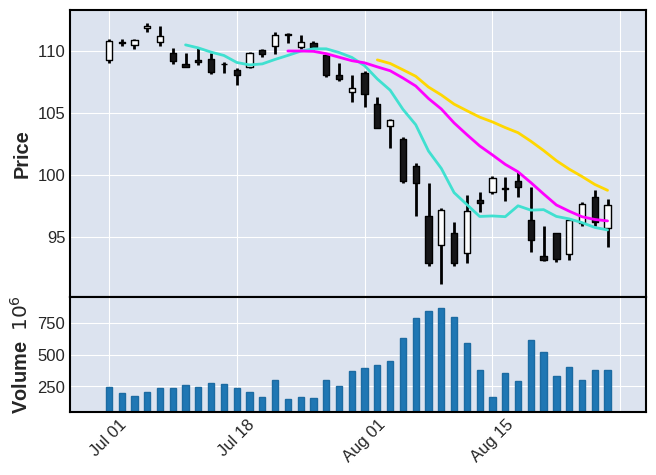

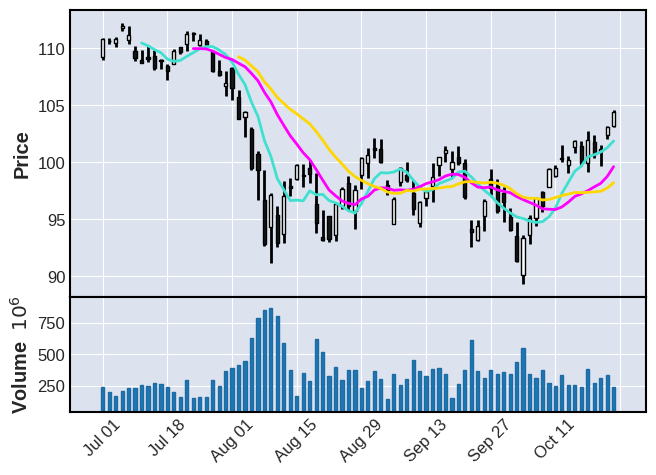

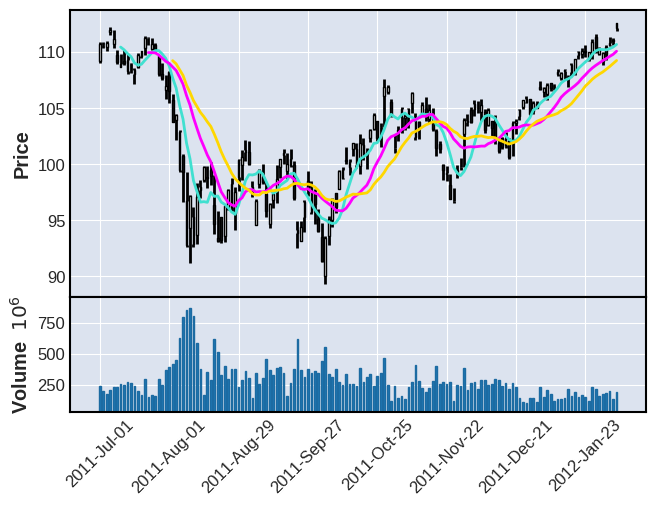

In [7]:
mpf.plot(df.iloc[0: 40],**setup,width_adjuster_version='v0')
mpf.plot(df.iloc[0: 80],**setup,width_adjuster_version='v0')
mpf.plot(df.iloc[0:150],**setup,width_adjuster_version='v0')

---

---

**Now let's see** the same three plots using the **new** algorithm:

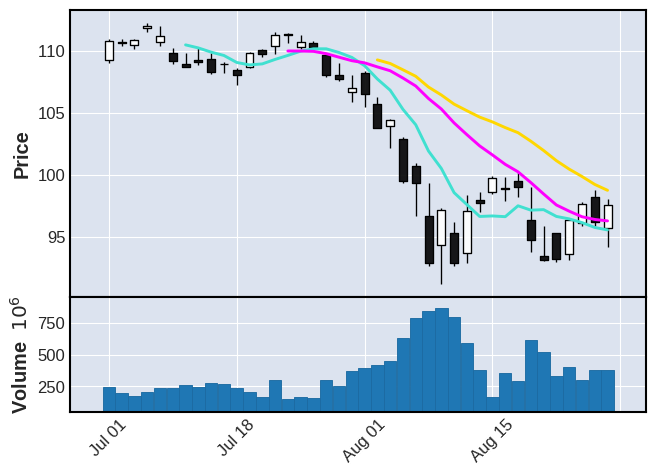

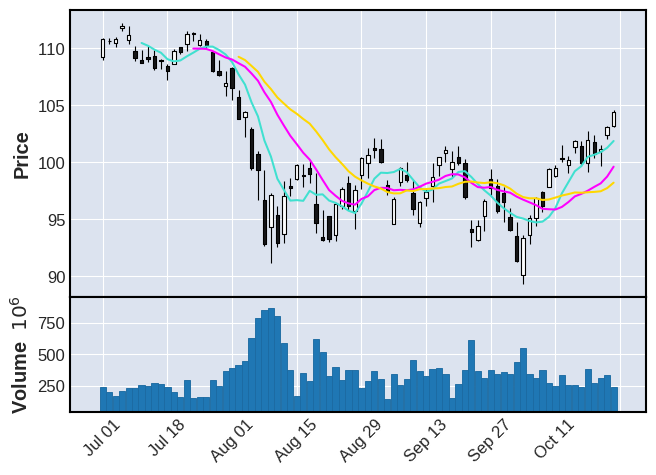

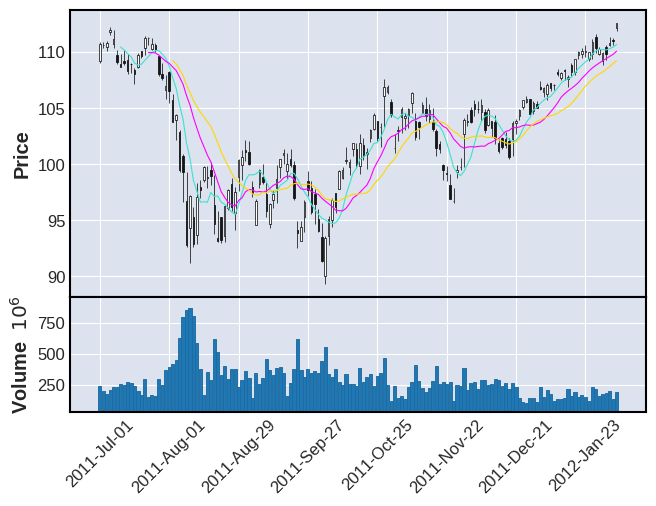

In [8]:
mpf.plot(df.iloc[0: 40],**setup)
mpf.plot(df.iloc[0: 80],**setup)
mpf.plot(df.iloc[0:150],**setup)

---

I think **most will agree** that the new algorithm is a significant improvement.

Here is the same comparison using ohlc bars:

   OLD 


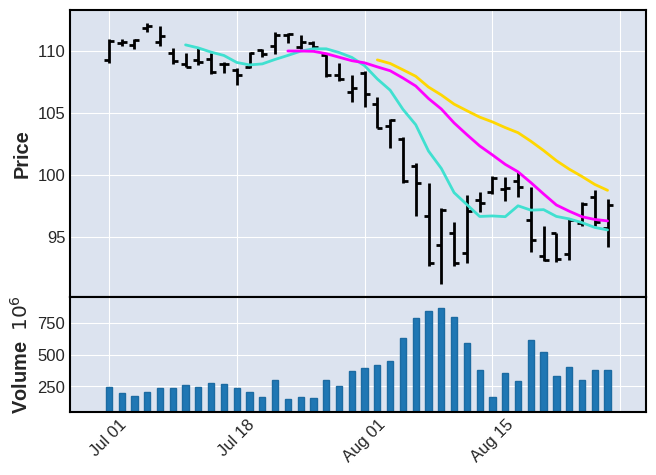

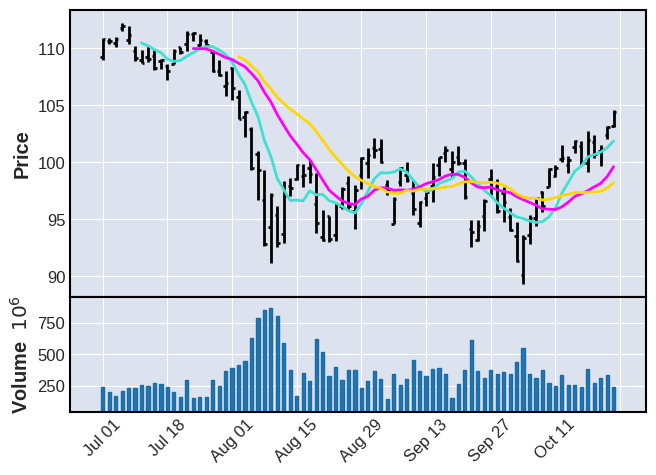

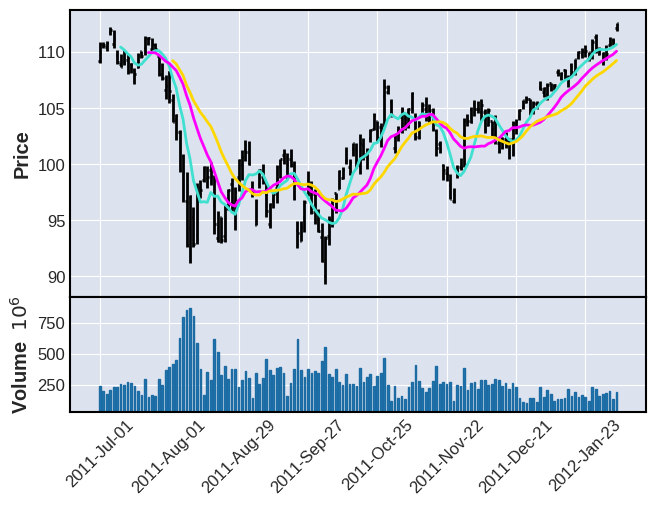

   NEW 


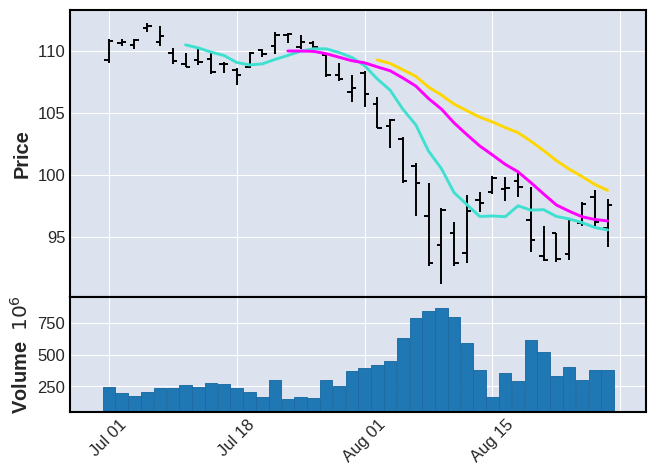

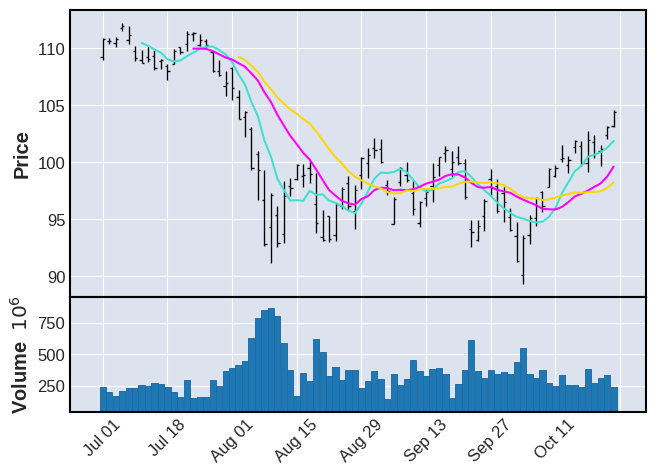

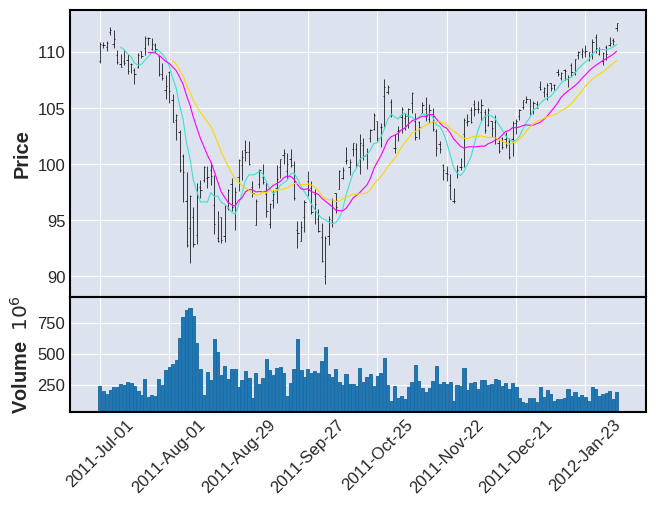

In [9]:
setup = dict(type='ohlc',volume=True, mav=(7,15,22))
print('''=========
   OLD 
=========''')
mpf.plot(df.iloc[0: 40],**setup,width_adjuster_version='v0')
mpf.plot(df.iloc[0: 80],**setup,width_adjuster_version='v0')
mpf.plot(df.iloc[0:150],**setup,width_adjuster_version='v0')
print('=====================================================================')
print('''=========
   NEW 
=========''')

mpf.plot(df.iloc[0: 40],**setup)
mpf.plot(df.iloc[0: 80],**setup)
mpf.plot(df.iloc[0:150],**setup)

---

That's all well and good.  But suppose we want to just tweak the results a little bit: make the candles or ohlc ticks or volume bars just a little bit thinner or thicker.  In order to do that, we need to understand that the algorithm cares about the widths of four main things (as we have been implying), and those are:
- candles
- ohlc open/close ticks
- volume bars
- lines (mav lines, and `plot(data,type='line')` lines)

The first three of the above four items is divided into two parts: (1) the width of the item itself, and (2) the width of its edge and/or associated lines (for example, the edge of the candles, and their wicks).  More on these two parts later.  For now let's focus on the four _main_ things, and how we can tweak the widths generated by the algorithm.

We saw above that we can choose which algorithm to use via kwarg `width_adjuster_version`.

Each "width adjuster" algorithm generates a "width configuration" that consists of the above three mentioned items (candles,ohlc,volume).  To modify the width that comes out of the algorithm, we use kwarg **` scale_width_adjustment `**.

We set **` scale_width_adjustment `** equal to a `dict()` containing one or more of the four keywords `candle`, `ohlc`, `volume`, or `lines`, where the *value* for each keyword is a number ***greater than*** or ***less than 1.0***  depending whether we want that object to be thicker or thinner.


**For example, suppose we want our volume bars narrower, but our candlesticks thicker:**

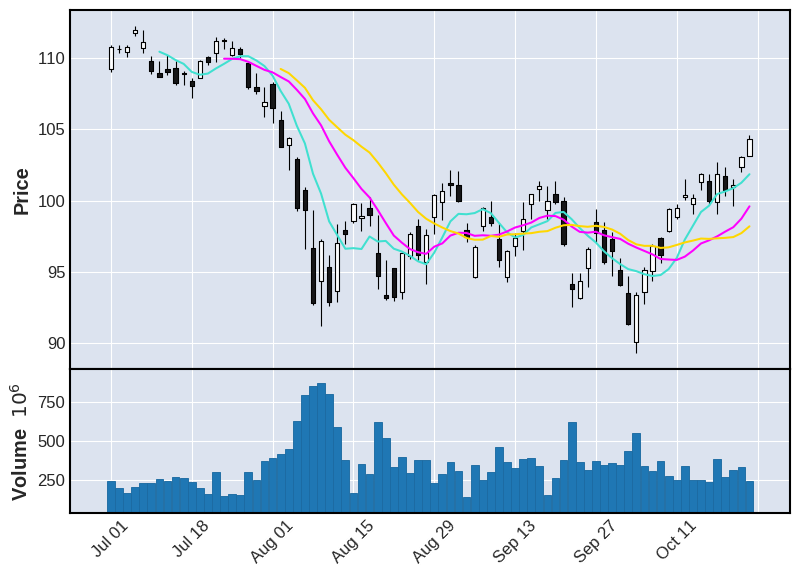

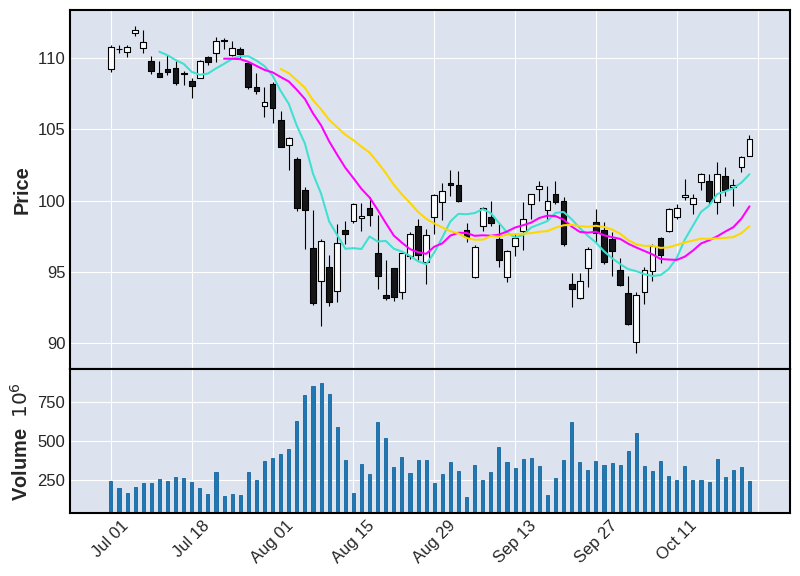

In [10]:
setup = dict(type='candle',volume=True,mav=(7,15,22),figscale=1.25)
mpf.plot(df.iloc[0:80],**setup)
mpf.plot(df.iloc[0:80],**setup,scale_width_adjustment=dict(volume=0.4,candle=1.35))

---
---

**Or perhaps we want our ohlc ticks and volume bars wider, and our mav lines thinner:**

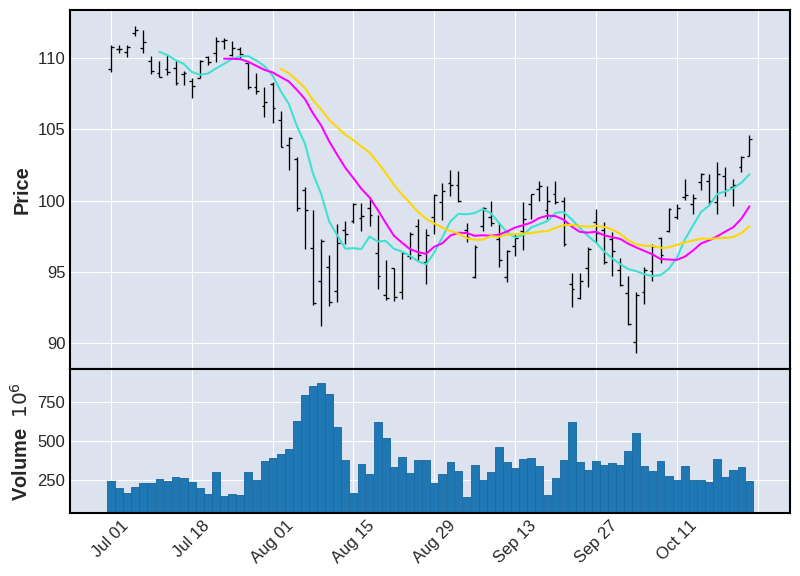

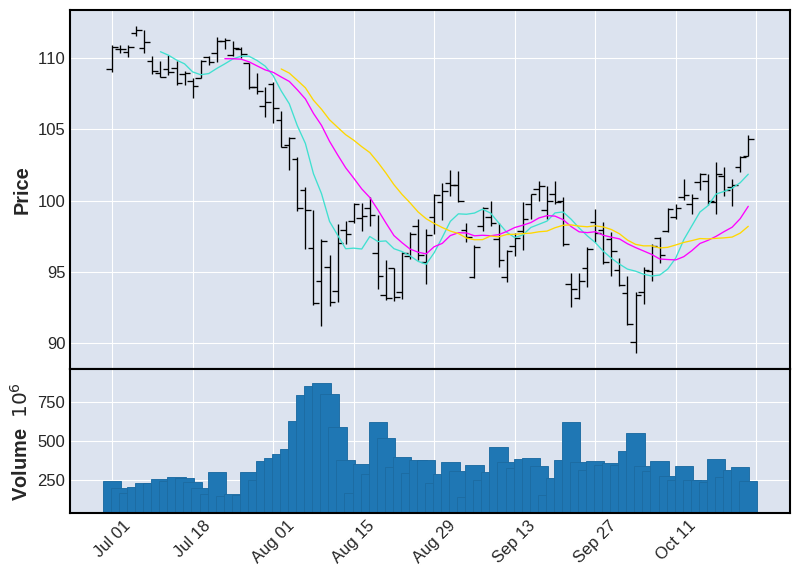

In [11]:
setup = dict(type='ohlc',volume=True,mav=(7,15,22),figscale=1.25)
mpf.plot(df.iloc[0:80],**setup)
mpf.plot(df.iloc[0:80],**setup,scale_width_adjustment=dict(ohlc=2.0,lines=0.65,volume=2.4))

---
### Manual customization of candle, ohlc, volume, and line widths:

Now suppose we want to simply *override* what the "width adjuster" algorithm is doing, for one or more aspects of the plot.  As a general rule, I would advise *against* doing this.  But if you want to experiment, here is how.

This is where we need to understand that each of the three items (candle,ohlc,volume) is subdivided into two parts.  This gives us a total of six width configuration keywords:



| Item   | Keyword          | Description
|:----   |:--------------   |:--------------------------------- |
| ohlc &nbsp;&nbsp;&nbsp;&nbsp;  | ohlc_ticksize &nbsp;&nbsp;&nbsp;&nbsp;   | horizontal length of left/right ticks 
|        | ohlc_linewidth   | thickness of ohlc lines
| candle &nbsp;&nbsp;&nbsp;&nbsp; | candle_width &nbsp;&nbsp;&nbsp;&nbsp;    | horizontal thickness of the candle body
|        | candle_linewidth &nbsp;&nbsp;&nbsp;&nbsp;| thickness of candle edge **and** its wick
| volume &nbsp;&nbsp;&nbsp;&nbsp;| volume_width     | horizontal thickness of volume bars
|        | volume_linewidth &nbsp;&nbsp;&nbsp;&nbsp;| thickness of edge surrounding volume bar &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
| lines &nbsp;&nbsp;&nbsp;&nbsp;| line_width     | thickness of mav lines, and line-plot lines

We can override any one of the six keywords in the above table using kwarg **` update_width_config `**.  We pass this kwarg a `dict()` containing one or more of the six keywords listed above.  The exact value we pass in will be used instead of the value generated by the width adjuster algorithm.  But for those items that we do not specify, the algorithm's value will be used (possibly modified by `scale_width_adjustment`).  Note that values set by **`update_width_config`** are taken exactly, and are ***not*** affected by `scale_width_adjustment`.

**A note of warning** about the values in the width configuration.  These values can vary greatly depending upon the data, ***especially if the user sets*** ` show_nontrading=True `, which can cause large changes to the width configuration values depending on the frequency (intraday, weekly, monthly, etc) of the data.

To mitigate the possibility of setting the width configuration to values that may not make sense, **you can see** the generated width configuration values using kwarg **` 'return_width_config' `**.  Simply set this kwarg equal to an **empty `dict()`** and mplfinance will return the width configuration values in the dict.  

**For example:**

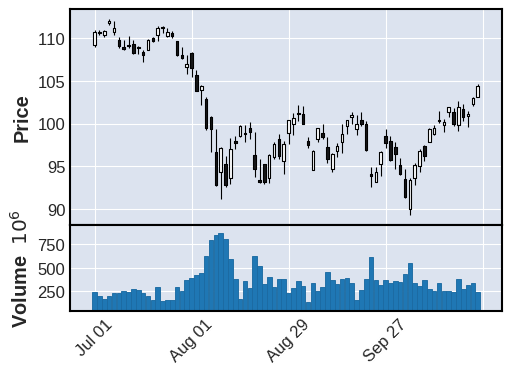

{'candle_linewidth': 0.7916666666666666,
 'candle_width': 0.525,
 'line_width': 1.4666666666666668,
 'ohlc_linewidth': 0.9583333333333334,
 'ohlc_ticksize': 0.35,
 'volume_linewidth': 0.65,
 'volume_width': 0.9533333333333333}


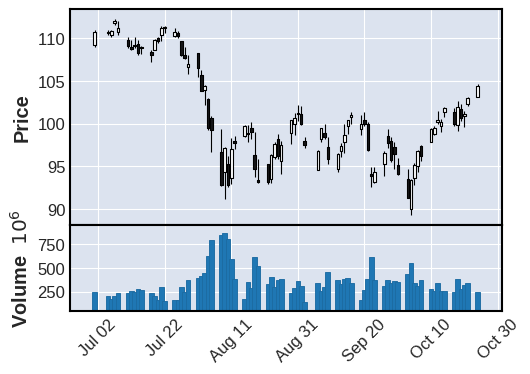

{'candle_linewidth': 0.7916666666666666,
 'candle_width': 0.777328125,
 'line_width': 1.4666666666666668,
 'ohlc_linewidth': 0.9583333333333334,
 'ohlc_ticksize': 0.51821875,
 'volume_linewidth': 0.65,
 'volume_width': 1.4115291666666667}


In [12]:
import pprint as pp

setup=dict(type='candle',volume=True,figscale=0.75)

wconfig = {}
mpf.plot(df.iloc[0:80],**setup,return_width_config=wconfig)
pp.pprint(wconfig)

wconfig={}
mpf.plot(df.iloc[0:80],**setup,return_width_config=wconfig,show_nontrading=True)
pp.pprint(wconfig)